# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os

# Progress bar
from tqdm import tqdm


import tensorflow as tf
from tensorflow.keras.utils import Sequence

# Preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Layer model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional, RepeatVector


from tensorflow.keras.applications import ResNet50, DenseNet201

# optimizer
from tensorflow.keras.optimizers import Adam

# Callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2025-05-03 02:44:25.611084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746240265.878619      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746240265.950292      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Dataset (csv Files )

In [2]:
 labels_csv = pd.read_csv("/kaggle/input/flickr30k_images/results.csv",delimiter='|')


In [3]:
labels_csv.head()

image_name  comment_number  \
0  1000092795.jpg               0   
1  1000092795.jpg               1   
2  1000092795.jpg               2   
3  1000092795.jpg               3   
4  1000092795.jpg               4   

                                             comment  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .

# Data Preprocessing

In [4]:
# Listing Columns in the Dataframe
labels_csv.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

### 1. Creating New Columns suggesting the path of Image

In [5]:
base_path = '/kaggle/input/flickr30k_images/flickr30k_images/'
labels_csv['image_path'] = labels_csv['image_name'].apply(lambda x: base_path + x)

In [6]:
labels_csv

image_name  comment_number  \
0       1000092795.jpg               0   
1       1000092795.jpg               1   
2       1000092795.jpg               2   
3       1000092795.jpg               3   
4       1000092795.jpg               4   
...                ...             ...   
158910   998845445.jpg               0   
158911   998845445.jpg               1   
158912   998845445.jpg               2   
158913   998845445.jpg               3   
158914   998845445.jpg               4   

                                                  comment  \
0        Two young guys with shaggy hair look at their...   
1        Two young , White males are outside near many...   
2        Two men in green shirts are standing in a yard .   
3            A man in a blue shirt standing in a garden .   
4                 Two friends enjoy time spent together .   
...                                                   ...   
158910   A man in shorts and a Hawaiian shirt leans ov...   
158911   A young man hanging over the side of a boat ,...   
158912   A man is leaning off of the side of a blue an...   
158913   A man riding a small boat in a harbor , with ...   
158914   A man on a moored blue and white boat with hi...   

                                               image_path  
0       /kaggle/input/flickr30k_images/flickr30k_image...  
1       /kaggle/input/flickr30k_images/flickr30k_image...  
2       /kaggle/input/flickr30k_images/flickr30k_image...  
3       /kaggle/input/flickr30k_images/flickr30k_image...  
4       /kaggle/input/flickr30k_images/flickr30k_image...  
...                                                   ...  
158910  /kaggle/input/flickr30k_images/flickr30k_image...  
158911  /kaggle/input/flickr30k_images/flickr30k_image...  
158912  /kaggle/input/flickr30k_images/flickr30k_image...  
158913  /kaggle/input/flickr30k_images/flickr30k_image...  
158914  /kaggle/input/flickr30k_images/flickr30k_image...  

[158915 rows x 4 columns]

### 2. Droping unnecessary Columns

In [7]:
# drop column='image_name'
labels_csv=labels_csv.drop(columns=['image_name'])
# drop column='comment_number'
labels_csv=labels_csv.drop(columns=[' comment_number'])

In [8]:

labels_csv

comment  \
0        Two young guys with shaggy hair look at their...   
1        Two young , White males are outside near many...   
2        Two men in green shirts are standing in a yard .   
3            A man in a blue shirt standing in a garden .   
4                 Two friends enjoy time spent together .   
...                                                   ...   
158910   A man in shorts and a Hawaiian shirt leans ov...   
158911   A young man hanging over the side of a boat ,...   
158912   A man is leaning off of the side of a blue an...   
158913   A man riding a small boat in a harbor , with ...   
158914   A man on a moored blue and white boat with hi...   

                                               image_path  
0       /kaggle/input/flickr30k_images/flickr30k_image...  
1       /kaggle/input/flickr30k_images/flickr30k_image...  
2       /kaggle/input/flickr30k_images/flickr30k_image...  
3       /kaggle/input/flickr30k_images/flickr30k_image...  
4       /kaggle/input/flickr30k_images/flickr30k_image...  
...                                                   ...  
158910  /kaggle/input/flickr30k_images/flickr30k_image...  
158911  /kaggle/input/flickr30k_images/flickr30k_image...  
158912  /kaggle/input/flickr30k_images/flickr30k_image...  
158913  /kaggle/input/flickr30k_images/flickr30k_image...  
158914  /kaggle/input/flickr30k_images/flickr30k_image...  

[158915 rows x 2 columns]

### 3. Renaming columns

In [9]:
labels_csv.columns = ['comment', 'image_path']

In [10]:
labels_csv

comment  \
0        Two young guys with shaggy hair look at their...   
1        Two young , White males are outside near many...   
2        Two men in green shirts are standing in a yard .   
3            A man in a blue shirt standing in a garden .   
4                 Two friends enjoy time spent together .   
...                                                   ...   
158910   A man in shorts and a Hawaiian shirt leans ov...   
158911   A young man hanging over the side of a boat ,...   
158912   A man is leaning off of the side of a blue an...   
158913   A man riding a small boat in a harbor , with ...   
158914   A man on a moored blue and white boat with hi...   

                                               image_path  
0       /kaggle/input/flickr30k_images/flickr30k_image...  
1       /kaggle/input/flickr30k_images/flickr30k_image...  
2       /kaggle/input/flickr30k_images/flickr30k_image...  
3       /kaggle/input/flickr30k_images/flickr30k_image...  
4       /kaggle/input/flickr30k_images/flickr30k_image...  
...                                                   ...  
158910  /kaggle/input/flickr30k_images/flickr30k_image...  
158911  /kaggle/input/flickr30k_images/flickr30k_image...  
158912  /kaggle/input/flickr30k_images/flickr30k_image...  
158913  /kaggle/input/flickr30k_images/flickr30k_image...  
158914  /kaggle/input/flickr30k_images/flickr30k_image...  

[158915 rows x 2 columns]

### Visualization

/kaggle/input/flickr30k_images/flickr30k_images/10002456.jpg


Text(0.5, 1.0, ' Several men in hard hats are operating a giant pulley system .')

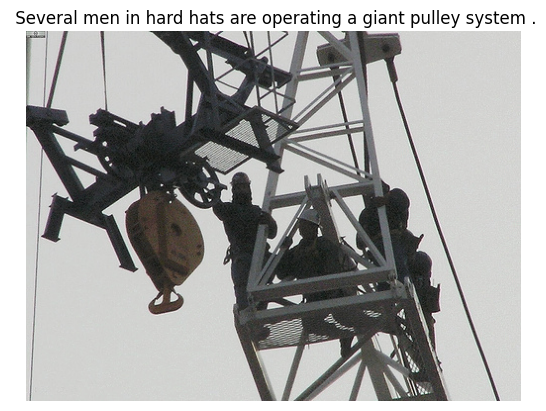

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Provide the path to the image file
image_path = labels_csv['image_path'][5]
print(image_path)
# Open the image
img = Image.open(image_path)

# Plot the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(labels_csv['comment'][5])

#### Text preprocessing

In [12]:
import re
def text_preprocessing(data):
    data['comment'] = data['comment'].apply(lambda x: x.lower())
    data['comment'] = data['comment'].apply(lambda x: re.sub(r"[^a-z\s]", "", x))
    data['comment'] = data['comment'].apply(lambda x: re.sub(r"\s+", " ", x))
    data['comment'] = data['comment'].apply(lambda x: " ".join([word for word in x.split() if len(word) > 1]))
    data['comment'] = "startseq " + data['comment'] + " endseq"
    return data

In [13]:
print(labels_csv.dtypes)

comment       object
image_path    object
dtype: object


In [14]:
null_count = labels_csv['comment'].isna().sum()
print(f"Number of null values in 'comment' column: {null_count}")

Number of null values in 'comment' column: 1


In [15]:
labels_csv = labels_csv.dropna(subset=['comment'])


In [16]:
data = text_preprocessing(labels_csv)
captions = labels_csv['comment'].tolist()

/tmp/ipykernel_19/2474629044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].apply(lambda x: x.lower())
/tmp/ipykernel_19/2474629044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].apply(lambda x: re.sub(r"[^a-z\s]", "", x))
/tmp/ipykernel_19/2474629044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [17]:
captions[0]

'startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq'

## Tokenization

In [18]:
# Step 1: Initialize a tokenizer object
tokenizer = Tokenizer()

# Step 2: Fit the tokenizer on the list of text captions
# This builds a vocabulary from the given captions
tokenizer.fit_on_texts(captions)

# Step 3: Get the vocabulary size
# `word_index` is a dictionary mapping words to their unique integer index
# We add 1 because index 0 is reserved for padding
vocab_size = len(tokenizer.word_index) + 1

# Step 4: Determine the maximum length of any caption in the dataset
# Splitting each caption into words and finding the max word count
max_length = max(len(caption.split()) for caption in captions)

# Step 5: Extract all unique image names from the dataset
# `.unique()` ensures we get only distinct image names
# `.tolist()` converts them into a Python list
images = data['image_path'].unique().tolist()

# Step 6: Count the total number of unique images
nimages = len(images)

# Step 7: Define a train-test split index (85% for training, 15% for validation)
split_index = round(0.85 * nimages)

# Step 8: Split images into training and validation sets
train_images = images[:split_index]  # First 85% images for training
val_images = images[split_index:]    # Remaining 15% for validation

# Step 9: Filter the dataset to create training and validation sets
# Selecting rows where the `image` column belongs to train or validation images
train = data[data['image_path'].isin(train_images)]
test = data[data['image_path'].isin(val_images)]

# Step 10: Reset index for train and test datasets
# This avoids issues with old indexing after filtering
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Step 11: Convert a sample caption into a sequence of tokenized words
# `texts_to_sequences()` replaces words with their corresponding integer tokens
tokenized_caption = tokenizer.texts_to_sequences([captions[1]])[0]


In [19]:
tokenized_caption

[1, 12, 19, 20, 703, 13, 54, 79, 192, 1415, 2]

## Image Feature Extraction

In [20]:
import numpy as np
import os
from keras.applications import DenseNet201
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from tqdm import tqdm
import tensorflow as tf
import gc

# Enable multi-GPU strategy
strategy = tf.distribute.MirroredStrategy()

img_size = 224
batch_size = 64

# Unique image paths
image_paths = labels_csv['image_path'].unique().tolist()

# Dictionary to store features
features = {}

with strategy.scope():
    base_model = DenseNet201(include_top=True)
    fe = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Process in batches
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i+batch_size]
    batch_imgs = []

    for path in batch_paths:
        img = load_img(os.path.join(path), target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0
        batch_imgs.append(img)

    batch_imgs = np.array(batch_imgs)

    # Predict batch
    batch_features = fe.predict(batch_imgs, verbose=0)

    # Store in dictionary
    for j, path in enumerate(batch_paths):
        features[path] = batch_features[j:j+1]  # preserve shape (1, 1920)

    del batch_imgs, batch_features
    gc.collect()


I0000 00:00:1746240284.019071      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746240284.019804      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


  0%|          | 0/497 [00:00<?, ?it/s]I0000 00:00:1746240308.154272      62 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746240308.154282      64 cuda_dnn.cc:529] Loaded cuDNN version 90300
100%|██████████| 497/497 [14:16<00:00,  1.72s/it]


In [21]:
class CustomDataGenerator(Sequence):
    
    def __init__(self, df, X_col, y_col, batch_size, directory, tokenizer, 
                 vocab_size, max_length, features,shuffle=True):
    
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.directory = directory
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.features = features
        self.shuffle = shuffle
        self.n = len(self.df)
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        return self.n // self.batch_size
    
    def __getitem__(self,index):
    
        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X1, X2, y = self.__get_data(batch)        
        return (X1, X2), y
    
    def __get_data(self,batch):
        
        X1, X2, y = list(), list(), list()
        
        images = batch[self.X_col].tolist()
           
        for image in images:
            feature = self.features[image][0]
            
            captions = batch.loc[batch[self.X_col]==image, self.y_col].tolist()
            for caption in captions:
                seq = self.tokenizer.texts_to_sequences([caption])[0]

                for i in range(1,len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=self.max_length,padding='post')[0]
                    out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]
                    X1.append(feature)
                    X2.append(in_seq)
                    y.append(out_seq)
            
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                
        return X1, X2, y




In [22]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Reshape, concatenate, RepeatVector, Dropout, add
from tensorflow.keras.models import Model

# Input for image features
input1 = Input(shape=(1920,))  # Image features (e.g., from DenseNet201)

# Input for text sequences
input2 = Input(shape=(max_length,))  # Partial captions

# Image feature processing
img_features = Dense(256, activation='relu')(input1)  # Shape: (None, 256)

# Text sequence processing
sentence_features = Embedding(vocab_size, 256, mask_zero=True)(input2)  # Shape: (None, max_length, 256)

# LSTM layer
sentence_features = LSTM(256)(sentence_features)  # Shape: (None, 256)

# Add skip connection
x = add([img_features, sentence_features])  # Shape: (None, 256)
x = Dropout(0.5)(x)

# Fully connected layers
x = Dense(128, activation='relu')(x)  # Shape: (None, 128)
x = Dropout(0.5)(x)

# Output layer
output = Dense(vocab_size, activation='softmax')(x)  # Shape: (None, vocab_size)

# Define the model
caption_model = Model(inputs=[input1, input2], outputs=output)

# Compile the model
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [23]:
caption_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 74)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1920)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 74, 256)        │      5,056,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 74)             │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        491,776 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 256)            │        525,312 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256)            │              0 │ dense[0][0],           │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         32,896 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 19750)          │      2,547,750 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,653,734 (33.01 MB)

 Trainable params: 8,653,734 (33.01 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)
train_generator = CustomDataGenerator(df=train,X_col='image_path',y_col='comment',batch_size=64,directory=image_path,
                                      tokenizer=tokenizer,vocab_size=vocab_size,max_length=max_length,features=features)

validation_generator = CustomDataGenerator(df=test,X_col='image_path',y_col='comment',batch_size=64,directory=image_path,
                                      tokenizer=tokenizer,vocab_size=vocab_size,max_length=max_length,features=features)

In [25]:
model_name = "model.keras"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 8, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [26]:
history = caption_model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=[checkpoint,earlystopping,learning_rate_reduction])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2110/2110 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - loss: 5.3275
Epoch 1: val_loss improved from inf to 4.41116, saving model to model.keras
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 2272s 1s/step - loss: 5.3273 - val_loss: 4.4112 - learning_rate: 0.0010
Epoch 2/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 4.2294
Epoch 2: val_loss improved from 4.41116 to 4.22649, saving model to model.keras
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 534s 252ms/step - loss: 4.2293 - val_loss: 4.2265 - learning_rate: 0.0010
Epoch 3/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 4.0674
Epoch 3: val_loss improved from 4.22649 to 4.16168, saving model to model.keras
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 539s 255ms/step - loss: 4.0674 - val_loss: 4.1617 - learning_rate: 0.0010
Epoch 4/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 3.9821
Epoch 4: val_loss improved from 4.16168 to 4.12474, saving model to model.keras
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 534s 252ms/step - loss: 3.9821 - val_loss: 4.1247 - learning_rate: 

In [27]:
def idx_to_word(integer,tokenizer):
    
    for word, index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

In [28]:
def predict_caption(model, image, tokenizer, max_length, features):
    
    feature = features[image]
    in_text = "startseq"
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length,padding='post')

        y_pred = model.predict([feature,sequence])
        y_pred = np.argmax(y_pred)
        
        word = idx_to_word(y_pred, tokenizer)
        
        if word is None:
            break
            
        in_text+= " " + word
        
        if word == 'endseq':
            break
            
    return in_text 

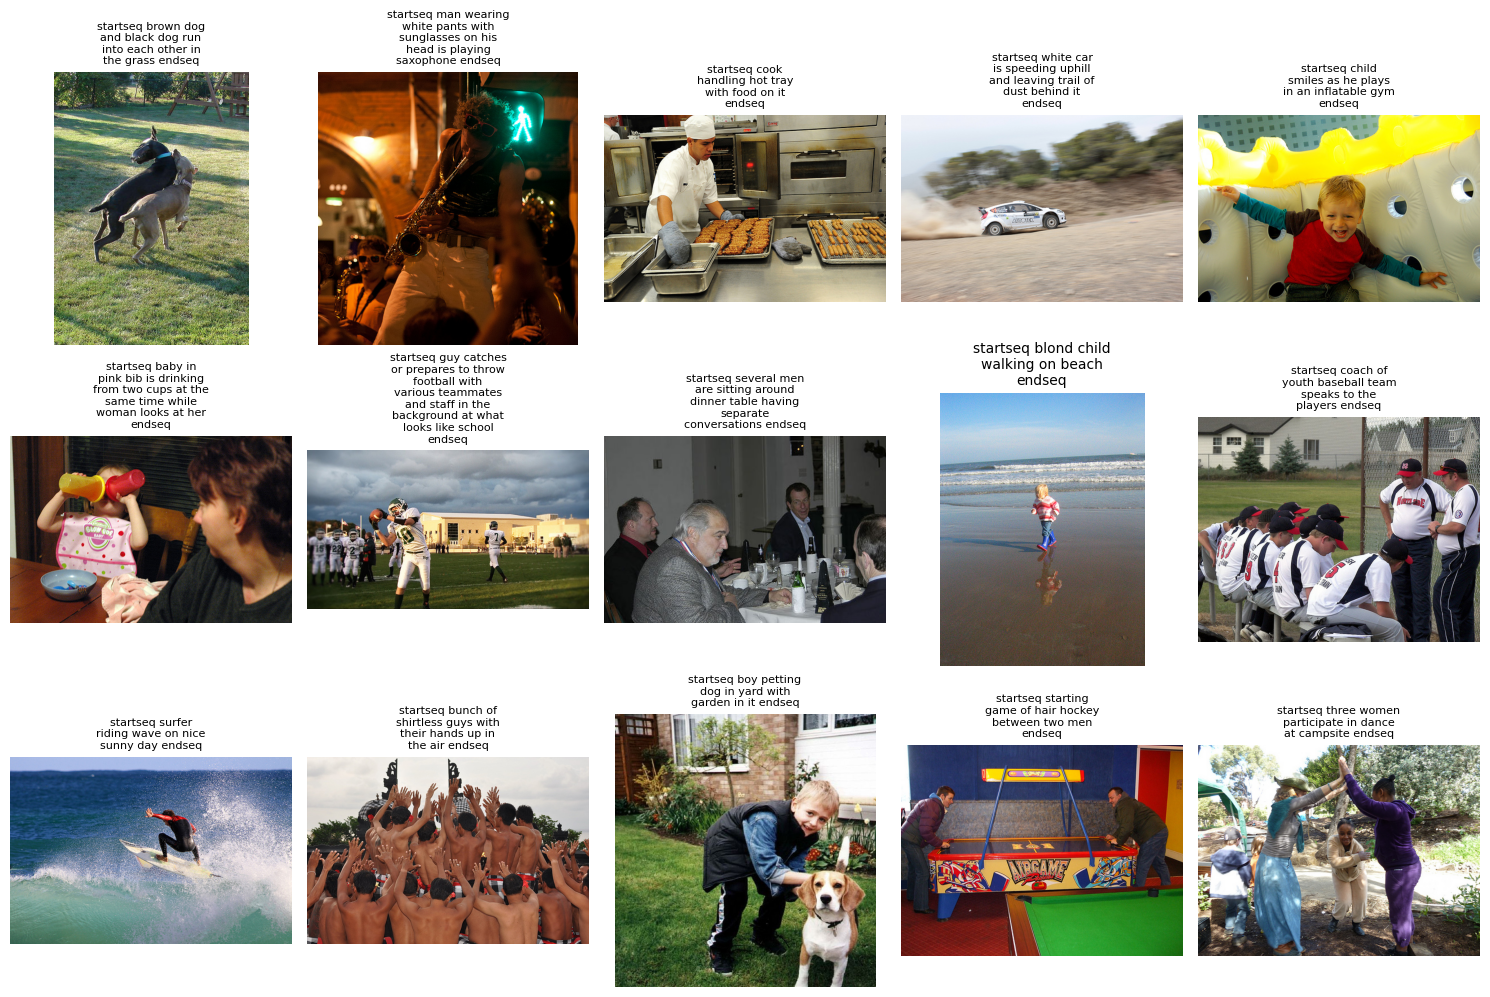

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import textwrap

# Sample 15 rows from test DataFrame
samples = test.sample(15)

# Extract references (comments)
references = samples['comment'].tolist()

# Reset index
samples.reset_index(drop=True, inplace=True)

# Plot images along with their corresponding references
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Increased height to reduce overlap
axes = axes.flatten()

for i, (img_path, ref, ax) in enumerate(zip(samples['image_path'], references, axes)):
    try:
        image = Image.open(img_path)  # Open image using PIL
        ax.imshow(image)
        ax.axis('off')  # Hide axes

        # Wrap text to prevent overlap
        wrapped_text = "\n".join(textwrap.wrap(ref, width=20))  # Adjust width for better wrapping

        # Reduce font size dynamically for longer text
        font_size = 10 if len(ref) < 50 else 8

        ax.set_title(wrapped_text, fontsize=font_size)  # Set comment as title
    except Exception as e:
        ax.axis('off')
        ax.set_title("Error loading image", fontsize=10)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

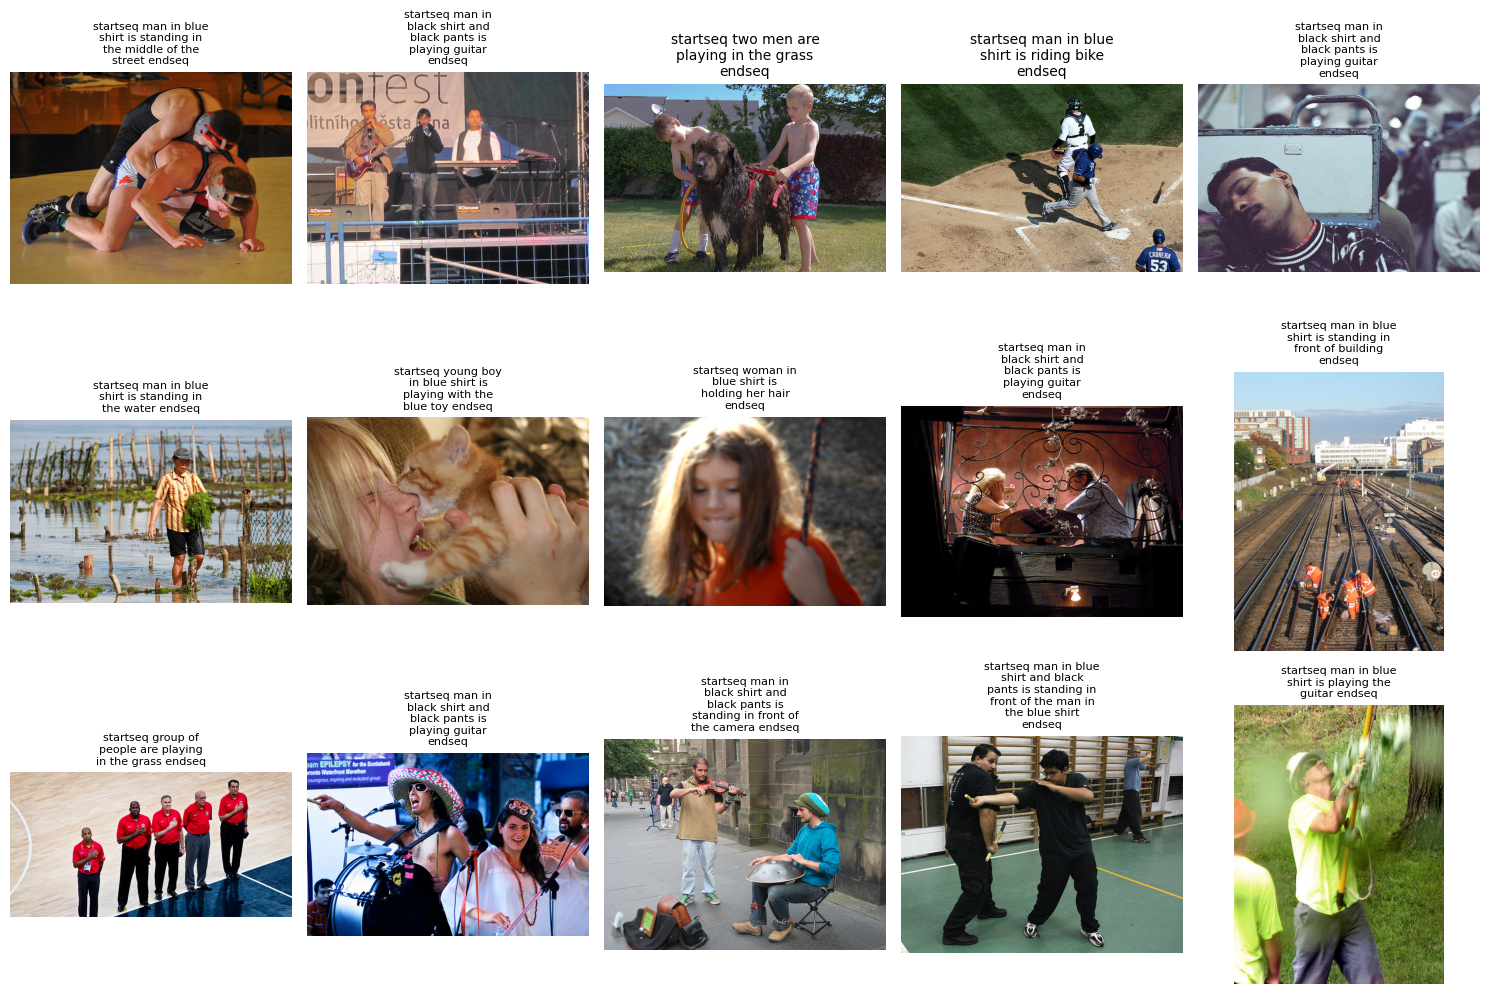

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import textwrap
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Sample 15 rows from test DataFrame
samples = test.sample(15)

# Reset index
samples.reset_index(drop=True, inplace=True)

# Store predictions
predictions = []

# Loop through samples and predict captions
for index, record in samples.iterrows():
    try:
        # Load and preprocess image
        img = load_img(os.path.join(record['image_path']), target_size=(224, 224))
        img = img_to_array(img)
        img = img / 255.0

        # Predict caption
        caption = predict_caption(caption_model, record['image_path'], tokenizer, max_length, features)
        predictions.append(caption)
        samples.loc[index, 'caption'] = caption  # Store caption in DataFrame
    except Exception as e:
        predictions.append("Error generating caption")
        samples.loc[index, 'caption'] = "Error generating caption"

# Plot images along with their corresponding predicted captions
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Adjust rows & columns as needed
axes = axes.flatten()

for i, (img_path, caption, ax) in enumerate(zip(samples['image_path'], predictions, axes)):
    try:
        image = Image.open(img_path)  # Open image using PIL
        ax.imshow(image)
        ax.axis('off')  # Hide axes

        # Wrap text to prevent overlap
        wrapped_text = "\n".join(textwrap.wrap(caption, width=20))  # Adjust width for better wrapping

        # Reduce font size dynamically for longer text
        font_size = 10 if len(caption) < 50 else 8

        ax.set_title(wrapped_text, fontsize=font_size)  # Set predicted caption as title
    except Exception as e:
        ax.axis('off')
        ax.set_title("Error loading image", fontsize=10)

plt.tight_layout()
plt.show()


In [31]:
print(max_length)

74


In [32]:
caption_model.get_weights()

[array([[-0.03404909, -0.02171226,  0.00306716, ..., -0.00326939,
         -0.01993111,  0.04824353],
        [ 0.21197914, -0.06643954,  0.22675528, ...,  0.00546328,
          0.5010198 ,  0.00646688],
        [-0.00827947, -0.02981487, -0.0475564 , ..., -0.0306881 ,
          0.03831932,  0.01766831],
        ...,
        [-0.01547677, -0.0486242 , -0.02880918, ...,  0.04222623,
         -0.04581404, -0.02672149],
        [-0.02523116, -0.01704882, -0.03683038, ..., -0.03707242,
          0.00739418,  0.01343826],
        [ 0.00915672, -0.01740525, -0.03159281, ...,  0.04475954,
          0.03131446, -0.01745025]], dtype=float32),
 array([[ 0.0055688 ,  0.02043765, -0.01354364, ...,  0.03298949,
         -0.04146671, -0.04337761],
        [ 0.03280172, -0.02060908,  0.18069054, ...,  0.04243618,
          0.16433997,  0.03691211],
        [ 0.0401176 ,  0.03428989, -0.26929647, ...,  0.01843308,
         -0.14863883, -0.04007009],
        ...,
        [ 0.04462891,  0.02251367, -0.0

In [33]:
max_length

74

In [34]:
print(img_features.shape)  # Should be (None, 1, 256)
print(sentence_features.shape)      # Should be (None, max_length, 256)


(None, 256)
(None, 256)
